In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('./airline-passengers.csv')

In [3]:
df['Month'] = pd.to_datetime(df['Month'])

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

month  passengers
0 1949-01-01         112
1 1949-02-01         118
2 1949-03-01         132
3 1949-04-01         129
4 1949-05-01         121

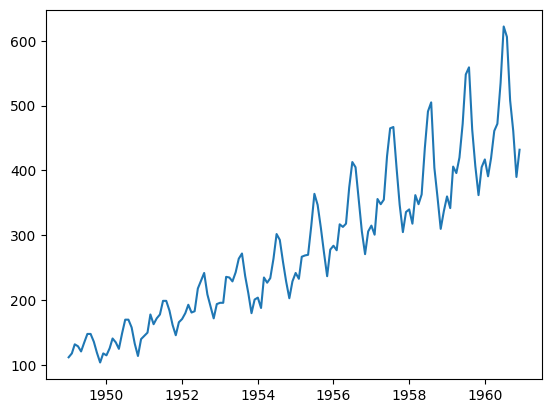

In [6]:
plt.plot(df['month'], df['passengers'])

In [7]:
number_of_tests = 12

In [8]:
train = df.iloc[:-number_of_tests, :]
test = df.iloc[-number_of_tests:, :]

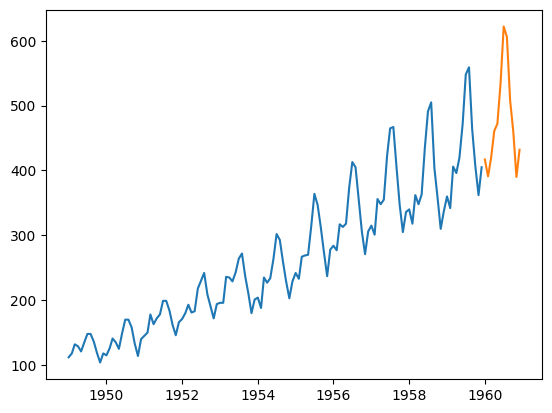

In [9]:
plt.plot(train['month'], train['passengers'])
plt.plot(test['month'], test['passengers'])

In [10]:
order = (1, 0, 0)
model = ARIMA(train['passengers'], order=order)
results = model.fit()

In [11]:
train_prediction = results.predict(0, len(train))

In [12]:
forecast = results.get_forecast(steps=number_of_tests)

In [13]:
test_prediction = forecast.predicted_mean
test_prediction_lower = forecast.conf_int().loc[:, 'lower passengers']
test_prediction_upper = forecast.conf_int().loc[:, 'upper passengers']

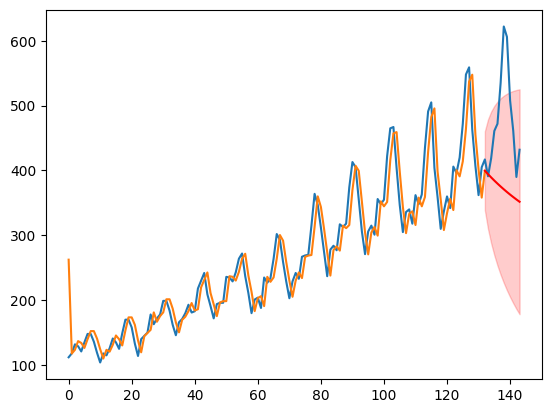

In [14]:
plt.plot(df['passengers'])
plt.plot(train_prediction)
plt.plot(test_prediction, color='red')
plt.fill_between(test_prediction_lower.index,
                y1 = test_prediction_lower,
                y2 = test_prediction_upper,
                color='red', alpha=0.2)

In [15]:
order = (0, 0, 1)
model = ARIMA(train['passengers'], order=order)
results = model.fit()

train_prediction = results.predict(0, len(train))

forecast = results.get_forecast(steps=number_of_tests)

test_prediction = forecast.predicted_mean

/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


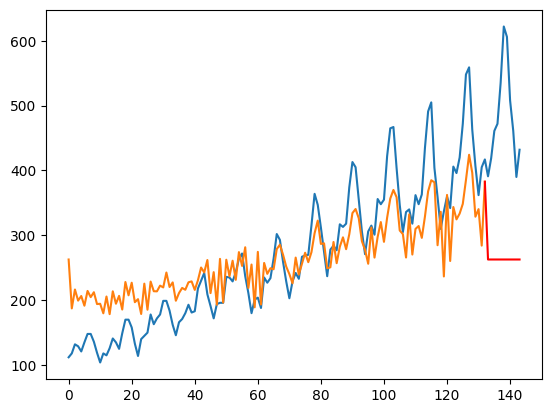

In [16]:
plt.plot(df['passengers'])
plt.plot(train_prediction)
plt.plot(test_prediction, color='red')


In [17]:
def do_modelling_and_plotting(target_col, order, log=False):
    model = ARIMA(train[target_col], order=order)
    results = model.fit()
    
    train_prediction = results.predict(0, len(train))
    forecast = results.get_forecast(number_of_tests)

    
    test_prediction = forecast.predicted_mean
    
    if log == True:
        train_prediction = np.exp(train_prediction)
        test_prediction = np.exp(test_prediction)
        
        
    sq_err = mean_squared_error(test['passengers'], test_prediction)
    rmse = np.sqrt(sq_err)

    plt.plot(df['passengers'])
    plt.plot(train_prediction)
    plt.plot(test_prediction, color='red')
    plt.title(f'ARIMA - {order} - RMSE: {rmse:.2f}')
    

/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


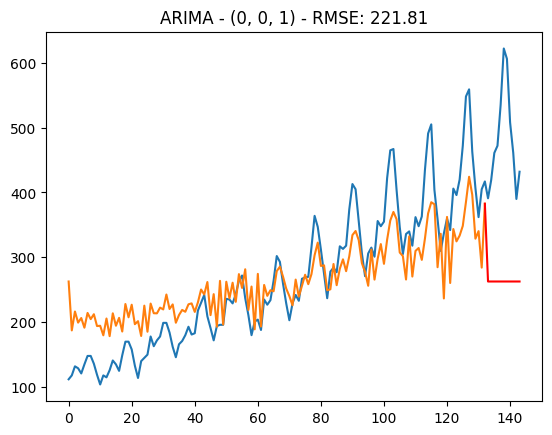

In [18]:
do_modelling_and_plotting('passengers', (0, 0, 1))

/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


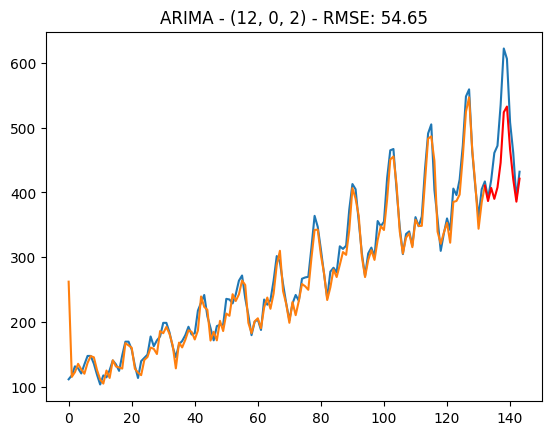

In [19]:
do_modelling_and_plotting('passengers', (12, 0, 2))

/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


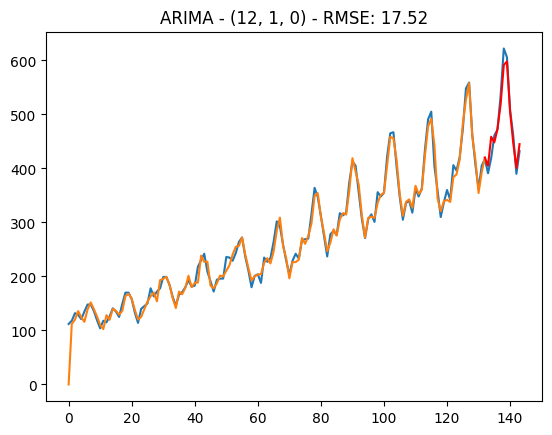

In [20]:
do_modelling_and_plotting('passengers', (12, 1, 0))

In [21]:
df['diff'] = df['passengers'] - df['passengers'].shift()

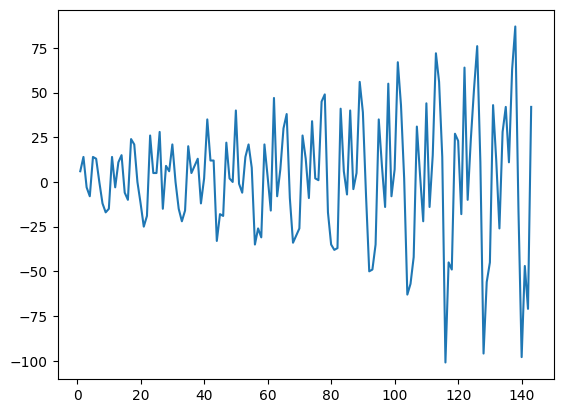

In [22]:
plt.plot(df['diff'])

In [23]:
df['log_passengers'] = np.log(df['passengers'])

In [24]:
train = df.iloc[:-number_of_tests, :]
test = df.iloc[-number_of_tests:, :]

/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


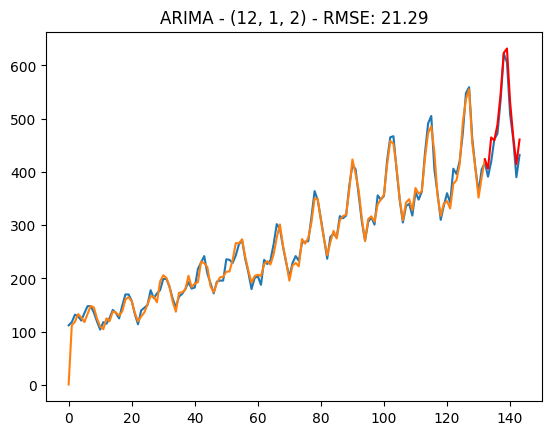

In [25]:
do_modelling_and_plotting('log_passengers', (12, 1, 2), log=True)

In [26]:
order = (12, 1, 2)
model = ARIMA(train['log_passengers'], order=order)
results = model.fit()

/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
train_prediction = np.exp(results.predict(0, len(train)))

In [28]:
forecast = results.get_forecast(steps=number_of_tests)

In [29]:
test_prediction = np.exp(forecast.predicted_mean)

/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


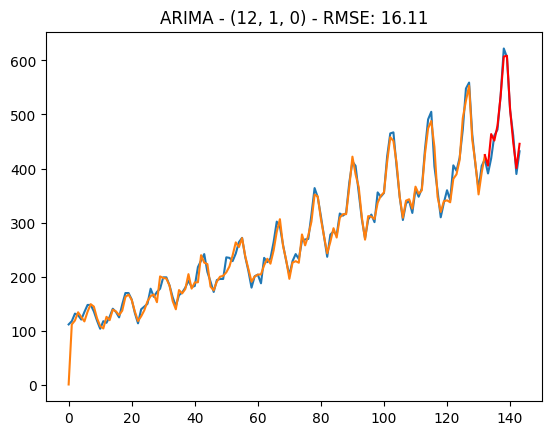

In [30]:
do_modelling_and_plotting('log_passengers', (12, 1, 0), log=True)